<a href="https://colab.research.google.com/github/edgardlt03/ICO-Trabajos/blob/main/Entrenamiento_Exportar_un_modelo_de_ML_ICO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


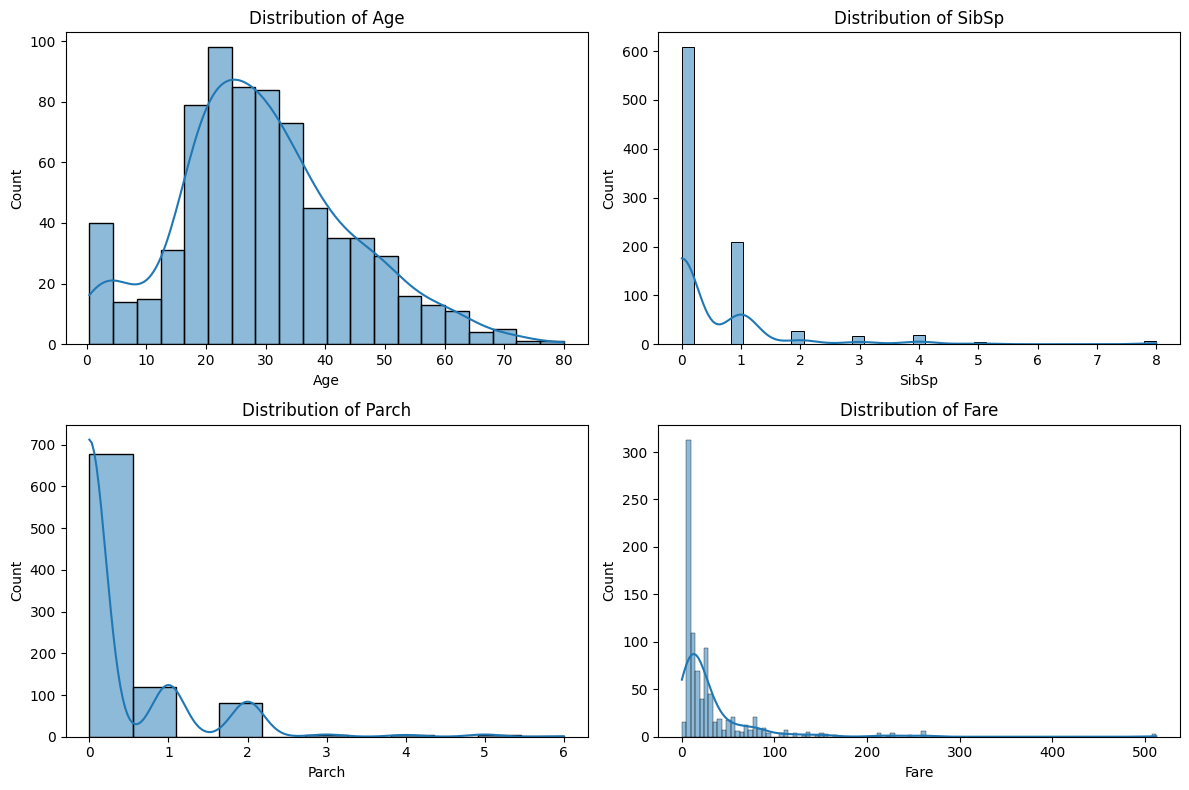

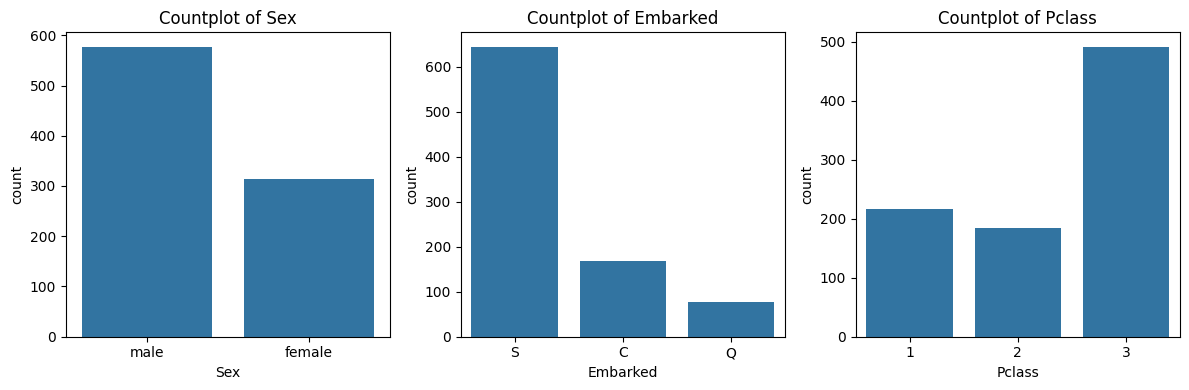

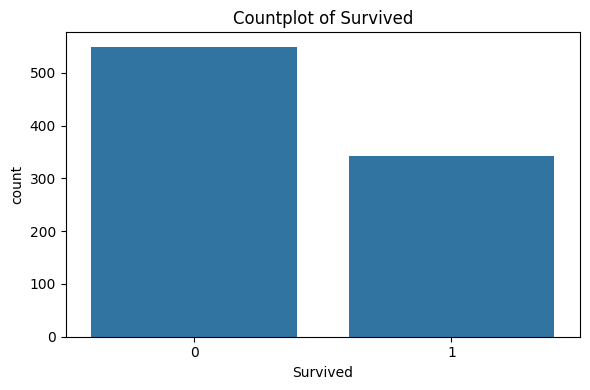

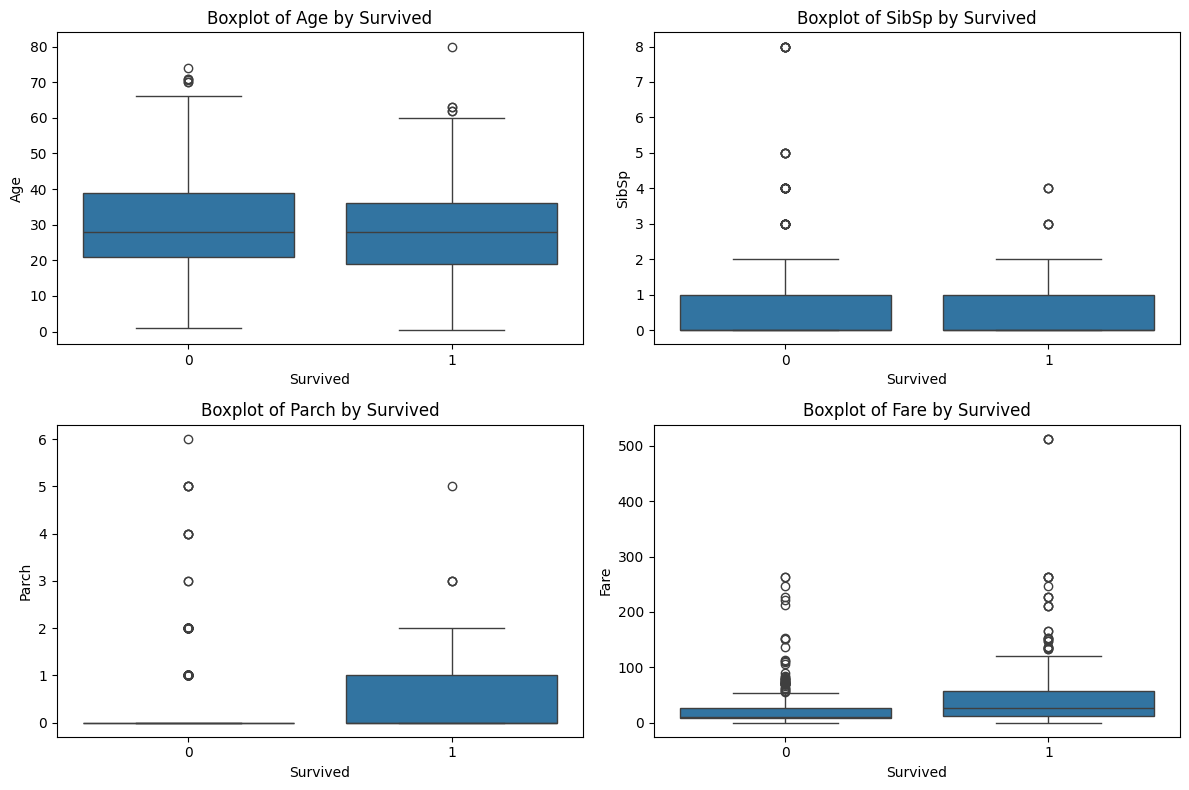

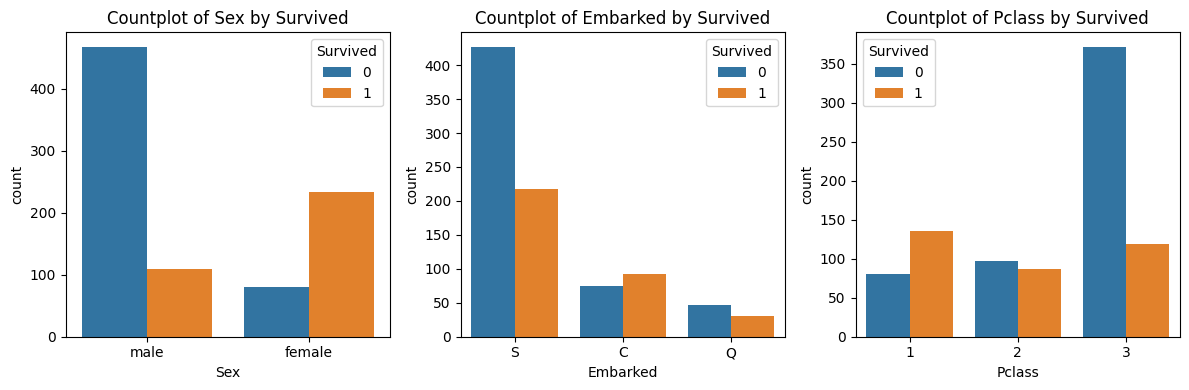

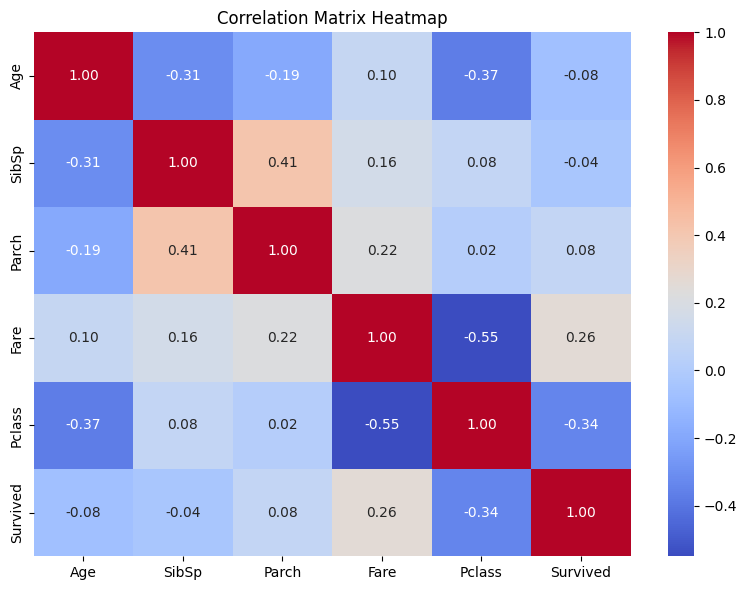

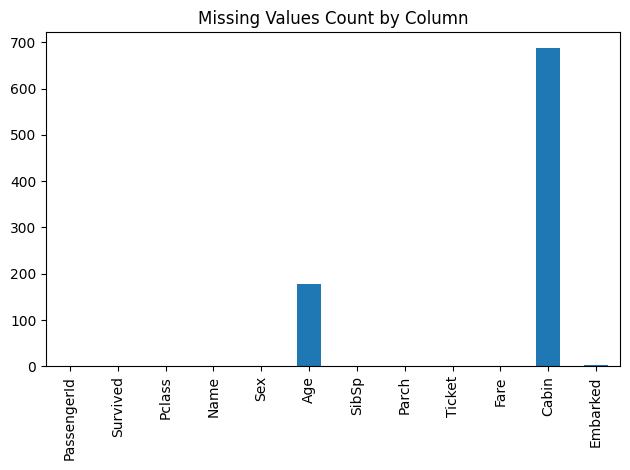

,0
Cabin,77.104377
Age,19.865320
Embarked,0.224467
PassengerId,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000


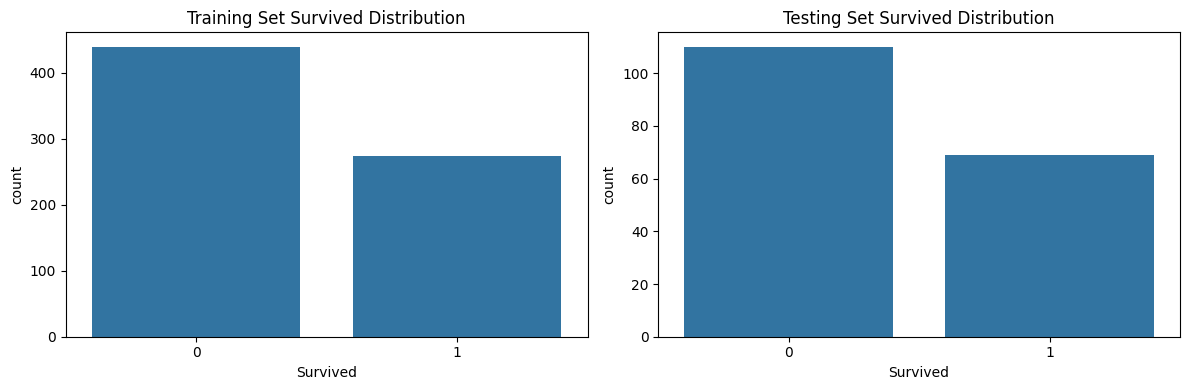

Processed train shape: (712, 10)

=== METRICAS ===
Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179


=== CONFUSION MATRIX (TABLA) ===


,Pred 0 (No),Pred 1 (Yes)
Actual 0 (No),97,13
Actual 1 (Yes),21,48


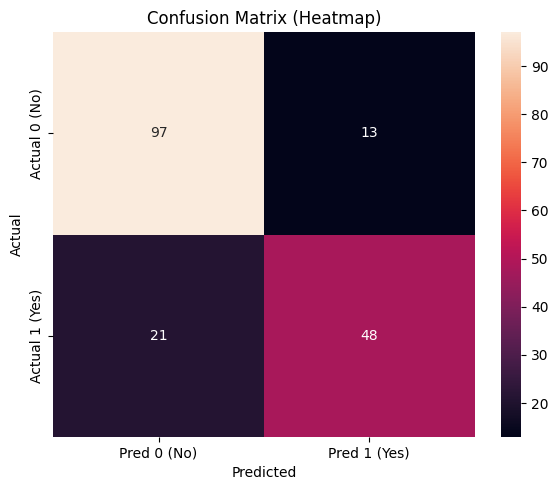


Modelo exportado a: /content/titanic_model.joblib


In [8]:


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


# 1) Load dataset

data_path = "/content/Titanic-Dataset.csv"

data = pd.read_csv(data_path)
display(data.head())


# 2) EDA

data.info()
display(data.describe(include="all").T)

numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_cols = ['Sex', 'Embarked', 'Pclass']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for ax, col in zip(axs.ravel(), numerical_cols):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(f'Countplot of {col}')
fig.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Survived')
plt.title('Countplot of Survived')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for ax, col in zip(axs.ravel(), numerical_cols):
    sns.boxplot(data=data, x='Survived', y=col, ax=ax)
    ax.set_title(f'Boxplot of {col} by Survived')
fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(data=data, x=col, hue='Survived', ax=ax)
    ax.set_title(f'Countplot of {col} by Survived')
fig.tight_layout()
plt.show()

corr_matrix = data[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Survived']].corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

missing_counts = data.isnull().sum()
missing_counts.plot(kind='bar')
plt.title("Missing Values Count by Column")
plt.tight_layout()
plt.show()

missing_percent = data.isnull().mean() * 100
display(missing_percent.sort_values(ascending=False))


# 3) Split

x = data[numerical_cols + categorical_cols].copy()
y = data['Survived'].copy()

mask = y.notna()
x, y = x.loc[mask], y.loc[mask].astype(int)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x=y_train, ax=axs[0])
axs[0].set_title('Training Set Survived Distribution')
sns.countplot(x=y_test, ax=axs[1])
axs[1].set_title('Testing Set Survived Distribution')
plt.tight_layout()
plt.show()


# 4) Preprocessing pipeline

preprocessing_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('cat',
             make_pipeline(
                 SimpleImputer(strategy='most_frequent'),
                 OneHotEncoder(handle_unknown='ignore')
             ),
             ['Sex', 'Embarked']),
            ('num_fare',
             make_pipeline(PowerTransformer(), StandardScaler()),
             ['Fare']),
            ('num',
             make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()),
             ['Age', 'SibSp', 'Parch']),
        ],
        remainder='passthrough',
        verbose_feature_names_out=False
    )
)

x_train_processed = preprocessing_pipeline.fit_transform(x_train, y_train)
print("Processed train shape:", x_train_processed.shape)


# 5) Modelo + Train

classification_model = make_pipeline(
    preprocessing_pipeline,
    LogisticRegression(max_iter=1000)
)
classification_model.fit(x_train, y_train)


# 6) Eval + Confusion Matrix (TABLA + HEATMAP)

y_test_pred = classification_model.predict(x_test)

acc = accuracy_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])

print("\n=== METRICAS ===")
print("Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

cm_df = pd.DataFrame(
    cm,
    index=["Actual 0 (No)", "Actual 1 (Yes)"],
    columns=["Pred 0 (No)", "Pred 1 (Yes)"]
)
print("\n=== CONFUSION MATRIX (TABLA) ===")
display(cm_df)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt="d")
plt.title("Confusion Matrix (Heatmap)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()


# 7) Exportar modelo

model_path = "/content/titanic_model.joblib"
joblib.dump(classification_model, model_path)
print("\nModelo exportado a:", model_path)

In [9]:


import pandas as pd
import joblib
import os

model_path = "/content/titanic_model.joblib"

loaded_model = joblib.load(model_path)

# Caso 1: probable NO sobreviva
case_no = pd.DataFrame([{
    "Age": 22,
    "SibSp": 0,
    "Parch": 0,
    "Fare": 7.25,
    "Sex": "male",
    "Embarked": "S",
    "Pclass": 3
}])

# Caso 2: probable SI sobreviva
case_yes = pd.DataFrame([{
    "Age": 28,
    "SibSp": 0,
    "Parch": 0,
    "Fare": 80.0,
    "Sex": "female",
    "Embarked": "C",
    "Pclass": 1
}])

def run_case(df, name):
    pred = int(loaded_model.predict(df)[0])
    proba = float(loaded_model.predict_proba(df)[0, 1])
    print(f"\n=== {name} ===")
    print("Prediccion Survived:", pred)
    print("P(Survived=1):", proba)
    display(df)

run_case(case_no, "CASO NO SOBREVIVE (hardcoded)")
run_case(case_yes, "CASO SI SOBREVIVE (hardcoded)")


=== CASO NO SOBREVIVE (hardcoded) ===
Prediccion Survived: 0
P(Survived=1): 0.10990114312927046


,Age,SibSp,Parch,Fare,Sex,Embarked,Pclass
0,22,0,0,7.25,male,S,3



=== CASO SI SOBREVIVE (hardcoded) ===
Prediccion Survived: 1
P(Survived=1): 0.9632522840166283


,Age,SibSp,Parch,Fare,Sex,Embarked,Pclass
0,28,0,0,80.0,female,C,1
